Part 4" Flowers_Recognition

In [ ]:
# WORKFLOW :
# Load Data
# Split into 60 and 40 ratio.
# Encode labels.
# Create Model
# Compilation Step (Note : Its a Multiclass Classification problem , select loss , metrics according to it)
# Train the Model.
# If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .
# Prediction should be > 85%
# Evaluation Step
# Prediction

In [ ]:
# The Convolutional Neural Network gained popularity through its use with image data,
# and is currently the state of the art for detecting what an image is, or what is contained in the image.

# The basic CNN structure is as follows:
#     Convolution -> Pooling -> Convolution -> Pooling -> Fully Connected Layer -> Output



In [ ]:
import pandas as pd 
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sb
from IPython.display import display, Image
from pandas import get_dummies
import os
import cv2
from tqdm import tqdm

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.optimizers import Adam, SGD
import pickle

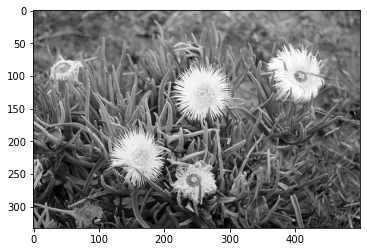

In [ ]:
DATADIR = "/home/abroalpha/notebook/flowers_img"


CATEGORIES = ["daisy", "dandelion","rose","sunflower","tulip"]

for category in CATEGORIES:  
    path = os.path.join(DATADIR,category)  # create path to flowers imsges
    for img in os.listdir(path):  # iterate over each image 
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [ ]:
print(img_array)
print(img_array.shape)

[[ 66  65  71 ...  77  72  68]
 [ 66  64  70 ...  76  72  65]
 [ 69  77  69 ...  78  74  65]
 ...
 [125 110 106 ...  41  29  20]
 [123 110 105 ...  29  53  40]
 [122 107 100 ...  84  93  61]]
(333, 500)


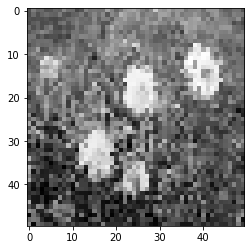

In [ ]:
IMG_SIZE = 50
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

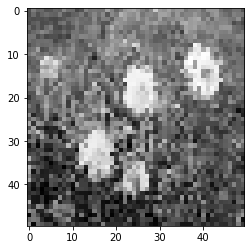

In [ ]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [ ]:
# Better. Let's try that. Next, we're going to want to create training data and all that, 
# but, first, we should set aside some images for final testing. I am going to just manually 
# create a directory called Testing and then create 2 directories.

training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path
        class_num = CATEGORIES.index(category)  # get the classification  (0,1,2,3,4).

        for img in tqdm(os.listdir(path)):  # iterate over each image 
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

100%|██████████| 984/984 [00:03<00:00, 308.98it/s]


In [ ]:
print(len(training_data))

4322


In [ ]:
import random

random.shuffle(training_data)

In [ ]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)


[[[[57]
   [54]
   [55]
   ...
   [67]
   [69]
   [64]]

  [[53]
   [54]
   [66]
   ...
   [78]
   [68]
   [56]]

  [[55]
   [84]
   [68]
   ...
   [73]
   [71]
   [59]]

  ...

  [[19]
   [20]
   [28]
   ...
   [47]
   [43]
   [29]]

  [[22]
   [33]
   [25]
   ...
   [53]
   [57]
   [45]]

  [[39]
   [43]
   [43]
   ...
   [71]
   [61]
   [57]]]]


In [ ]:
X = X/255.0
X

array([[[[0.00087659],
         [0.00083045],
         [0.00084583],
         ...,
         [0.00103037],
         [0.00106113],
         [0.00098424]],

        [[0.00081507],
         [0.00083045],
         [0.00101499],
         ...,
         [0.00119954],
         [0.00104575],
         [0.00086121]],

        [[0.00084583],
         [0.00129181],
         [0.00104575],
         ...,
         [0.00112265],
         [0.00109189],
         [0.00090734]],

        ...,

        [[0.0002922 ],
         [0.00030757],
         [0.0004306 ],
         ...,
         [0.0007228 ],
         [0.00066128],
         [0.00044598]],

        [[0.00033833],
         [0.0005075 ],
         [0.00038447],
         ...,
         [0.00081507],
         [0.00087659],
         [0.00069204]],

        [[0.00059977],
         [0.00066128],
         [0.00066128],
         ...,
         [0.00109189],
         [0.0009381 ],
         [0.00087659]]],


       [[[0.0002153 ],
         [0.00019992],
         [0.00

In [ ]:
y

array([0, 3, 0, ..., 4, 2, 1])

In [ ]:
# Our training_data is a list, meaning it's mutable, so it's now nicely shuffled. 
# We can confirm this by iterating over a few of the initial samples and printing out the class.

for sample in training_data[:10]:
    print(sample[1])
    
# Great, we've got the classes nicely mixed in! Time to make our model!

0
3
0
1
3
4
3
0
1
2


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import pickle

Data = pickle.load(open("X.pickle","rb"))
y = pickle.load(open("y.pickle","rb"))

X = Data/255.0

In [ ]:

# X = []
# y = []
import numpy as np
# for features,label in training_data:
#     X.append(features)
#     y.append(label)


# X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)


In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_lab)


In [ ]:
test_loss,test_acc

In [ ]:
import pickle

IMG_SIZE= 50

X = pickle.load(open("X.pickle","rb"))
y = pickle.load(open("y.pickle","rb"))

# len(X_test)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)
X = X/255.0

[[[[ 29]
   [ 25]
   [ 24]
   ...
   [130]
   [120]
   [113]]

  [[ 56]
   [ 39]
   [ 28]
   ...
   [119]
   [111]
   [110]]

  [[ 21]
   [ 31]
   [ 82]
   ...
   [ 99]
   [ 94]
   [ 94]]

  ...

  [[ 82]
   [ 71]
   [ 62]
   ...
   [ 54]
   [ 96]
   [ 69]]

  [[103]
   [ 93]
   [ 98]
   ...
   [ 92]
   [ 44]
   [102]]

  [[108]
   [ 98]
   [101]
   ...
   [ 44]
   [ 77]
   [ 56]]]]


In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten



network = models.Sequential()
network.add(Flatten())
network.add(layers.Dense(124, activation='relu', input_shape=X.shape[1:]))
network.add(layers.Dense(, activation='relu'))
network.add(layers.Dense(32, activation='relu'))
network.add(layers.Dense(32, activation='relu'))
network.add(layers.Dense(1, activation='sigmoid'))
# network.add(layers.Dense(8, activation='nelu'))

In [ ]:
network.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])


# loss='categorical_crossentropy',a

In [ ]:
network.fit(X, y, batch_size=32, epochs=8)

Epoch 1/8
136/136 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2531
Epoch 2/8
136/136 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2480
Epoch 3/8
136/136 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2417
Epoch 4/8
136/136 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2373
Epoch 5/8
136/136 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2469
Epoch 6/8
136/136 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2440
Epoch 7/8
136/136 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2422
Epoch 8/8
136/136 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2473


In [ ]:
test_loss, test_acc = network.evaluate(X, y)

136/136 [==============================] - 0s 892us/step - loss: 0.0000e+00 - accuracy: 0.2434


In [ ]:
test_loss, test_acc

(0.8096311092376709, 0.5)